In [1]:
# This Code will make a EW vs B plot
import spectrum_fit
from glob import glob
from astropy import units as u
import numpy
import matplotlib.pyplot as plt
%matplotlib inline


def measure_ew_lim(filename):
    from linetools.lists.linelist import LineList
    import numpy
    from astropy import units as u
    from linetools.spectralline import AbsLine
    from linetools.spectra.xspectrum1d import XSpectrum1D
    
    sp=XSpectrum1D.from_file('RF_'+ filename)
    sp.normalize(co=sp.co)
    
    wv0=5891.00*u.AA
    R=4013.0/.3
    d_lambda_pix=0.13333317282580992
    d_lambda_res=5891.0/R
    N_pix=d_lambda_res/d_lambda_pix
    s_2_n=sp.get_local_s2n(wv0, npix=100)[0] #/100 S_2_N per pixel
    EW_lim=3.0*numpy.sqrt(N_pix)*d_lambda_pix/s_2_n # 1 sigma limit
    return EW_lim

In [2]:
fnames=glob('GOTO*F.fits')
b_good=[]
b_bad=[]
s1=[]
s2=[]
s1_err=[]
ew_lim=[]

/Users/ryan/linetools/linetools/lists/linelist.py:399: RuntimeWarning: divide by zero encountered in log10
  self._data['log(w*f)'] = np.log10(qm_strength)
/Users/ryan/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)
/Users/ryan/linetools/linetools/lists/linelist.py:828: UserWarning: This from_table_to_dict will be deprecated
  warnings.warn("This from_table_to_dict will be deprecated")


Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


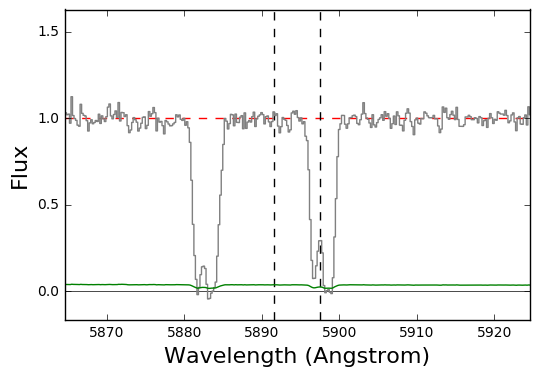

/Users/ryan/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/ma/core.py:867: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)
/Users/ryan/linetools/linetools/analysis/linelimits.py:165: UserWarning: Redshift=0.  If this is unexpected, set _z and reset limits
  warnings.warn("Redshift=0.  If this is unexpected, set _z and reset limits")


Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Does this Spectra Contain Sodium Absoprtion (y or n): n
We are ignoring GOTOQJ0851+0719a_F.fits


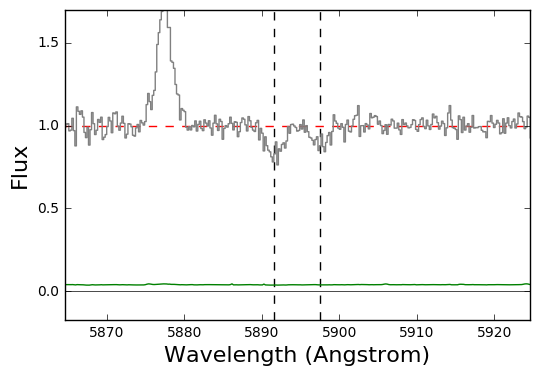

Does this Spectra Contain Sodium Absoprtion (y or n): y
We are using GOTOQJ0902+1414a_F.fits


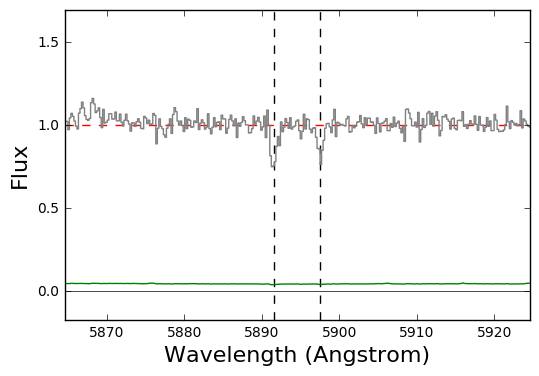

Does this Spectra Contain Sodium Absoprtion (y or n): y
We are using GOTOQJ0902+1414b_F.fits


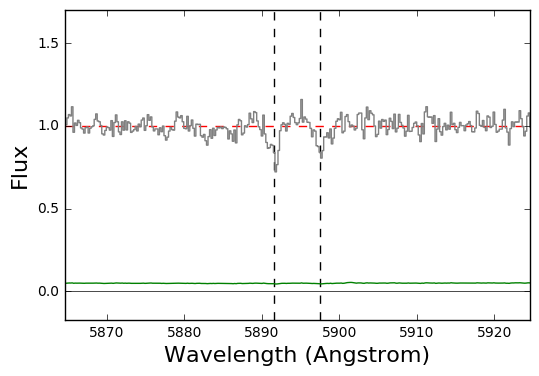

Does this Spectra Contain Sodium Absoprtion (y or n): y
We are using GOTOQJ0950+5442a_F.fits


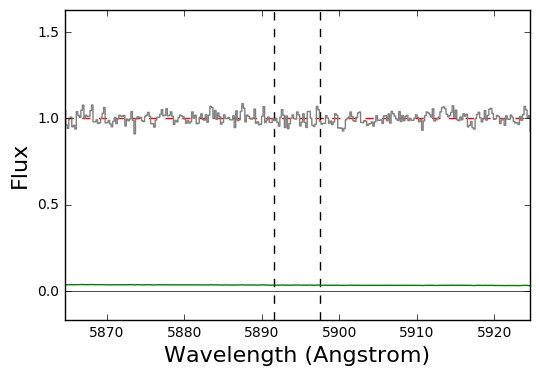

Does this Spectra Contain Sodium Absoprtion (y or n): n
We are ignoring GOTOQJ1005+5302a_F.fits


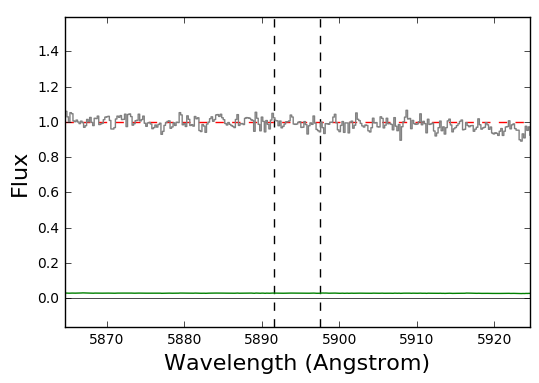

Does this Spectra Contain Sodium Absoprtion (y or n): n
We are ignoring GOTOQJ1044+0518a_F.fits


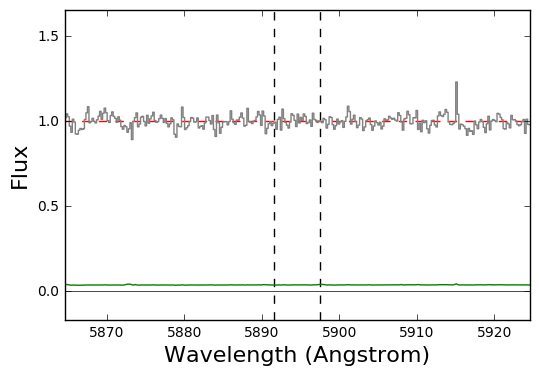

Does this Spectra Contain Sodium Absoprtion (y or n): n
We are ignoring GOTOQJ1158+3907a_F.fits


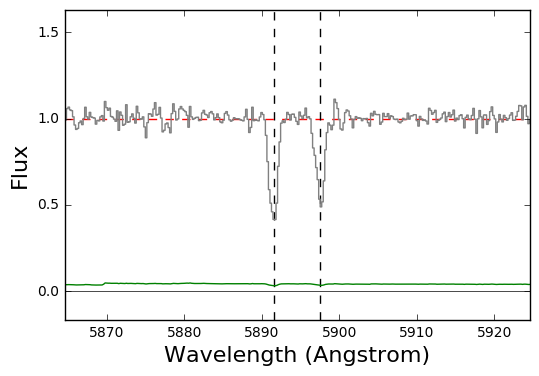

Does this Spectra Contain Sodium Absoprtion (y or n): y
We are using GOTOQJ1238+6448a_F.fits


In [3]:
for name in fnames:
    a=spectrum_fit.measure_sodium_EW(name)
    data=spectrum_fit.get_prop(name)
    check= str(input("Does this Spectra Contain Sodium Absoprtion (y or n): "))
    if check == 'n':
        print('We are ignoring {}'.format(name))
        ew_lim.append(measure_ew_lim(name))
        b_bad.append(data[0]['b'][0])
    else:
        b_good.append(data[0]['b'][0])
        s1.append(a[0][0]/u.AA)
        s1_err.append(a[0][1]/u.AA)
        s2.append(a[1][0]/u.AA)
        print('We are using {}'.format(name))

In [4]:
#Get June Data
import pickle
infile='/Users/ryan/Desktop/keck_spectra/GOTOQs_Jun2017/ew_june.dat'
jdata = pickle.load(open(infile, "rb"))

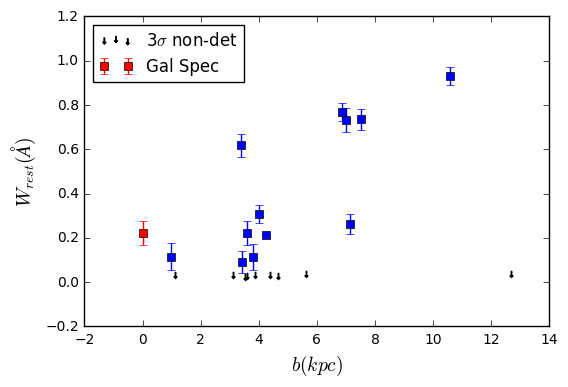

In [13]:
arrow = u'$\u2193$'


plt.errorbar(0,s1[0],yerr=s1_err[0],fmt='rs',label='Gal Spec')
#s1=numpy.delete(s1, 0)
#s1_err=numpy.delete(s1_err, 0)
#b_good=numpy.delete(b_good, 0)

plt.errorbar(b_good,s1,yerr=s1_err,fmt='bs')
plt.errorbar(jdata[0]['b'],jdata[1]['ew'],yerr=jdata[2]['err'],fmt='bs')

plt.scatter(b_bad,numpy.asarray(ew_lim),marker=arrow,label='3$\sigma$ non-det')
plt.scatter(jdata[3]['b_bad'],jdata[4]['lim'],marker=arrow)



#plt.plot(b_good,s2,'r.')
plt.ylabel('$W_{rest}(\AA)$',fontsize=14)
plt.xlabel('$b(kpc)$',fontsize=14)
#plt.xlim(-.1,13)
#plt.ylim(-0.01,1)
plt.legend(loc=0)
plt.savefig('Sodium_all_data_new.pdf')

In [6]:
s1

array([ 0.22133365,  0.11459735,  0.73244336])

In [7]:
 from linetools.spectra.xspectrum1d import XSpectrum1D

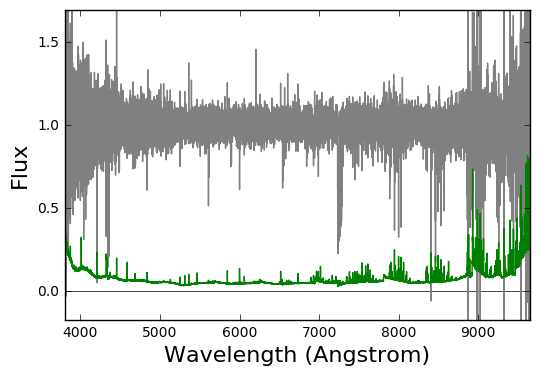

In [8]:
sp=XSpectrum1D.from_file('RF_'+ fnames[2])
sp.normalize(co=sp.co)
sp.plot()

In [9]:

import numpy

w=numpy.where(numpy.logical_and(sp.wavelength/u.AA > 5888, sp.wavelength/u.AA <5896))

In [10]:
wave=sp.wavelength[w]/u.AA
flux=sp.flux[w]

<Quantity 0.2316369671901398>

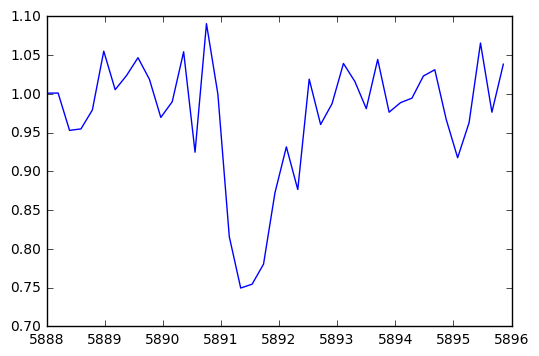

In [11]:
plt.plot(wave,flux)
from scipy.integrate import trapz
numpy.trapz(wave,flux)
trapz((1.0-flux), x=wave)

In [12]:
s1_err


array([ 0.05532216,  0.06056474,  0.05347559])